
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score

In [12]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [ ]:
X = ha.drop(["cp"], axis = 1)
y = ha["cp"]

In [13]:
ha = ha.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),
         make_column_selector(dtype_include = object)),
        ('standardize', StandardScaler(), make_column_selector(dtype_include = np.number))
    ], remainder = 'passthrough'
).set_output(transform='pandas')

In [ ]:
knn_pipe1 = Pipeline([
    ('preprocessing', ct),
    ('knn', KNeighborsClassifier())
])

degrees = {'knn__n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}

gscv = GridSearchCV(knn_pipe1, degrees, cv=5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

result_df = pd.DataFrame(data={'knn__n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], "scores": gscv_fitted.cv_results_['mean_test_score']})
max_index = result_df['knn__n_neighbors'].idxmax()

row_with_max_value = result_df.loc[max_index]

print(row_with_max_value)

knn__n_neighbors    50.000000
scores               0.520404
Name: 9, dtype: float64


Decision tree

In [ ]:
#Decision Tree
Decision_Tree_pipe1 = Pipeline([
    ('preprocessing', ct),
    ('decision_tree', DecisionTreeClassifier())
])

degrees = {'decision_tree__max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}

gscv = GridSearchCV(Decision_Tree_pipe1, degrees, cv=5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

result_df = pd.DataFrame(data={'decision_tree__max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], "scores": gscv_fitted.cv_results_['mean_test_score']})
max_index = result_df['scores'].idxmax()

row_with_max_value = result_df.loc[max_index]

print(row_with_max_value)

decision_tree__max_depth    5.000000
scores                      0.424848
Name: 0, dtype: float64


In [ ]:
Decision_Tree_pipe = Pipeline([
    ('preprocessing', ct),
    ('decision_tree', DecisionTreeClassifier(max_depth=5))
])
best_model = Decision_Tree_pipe.fit(X,y)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

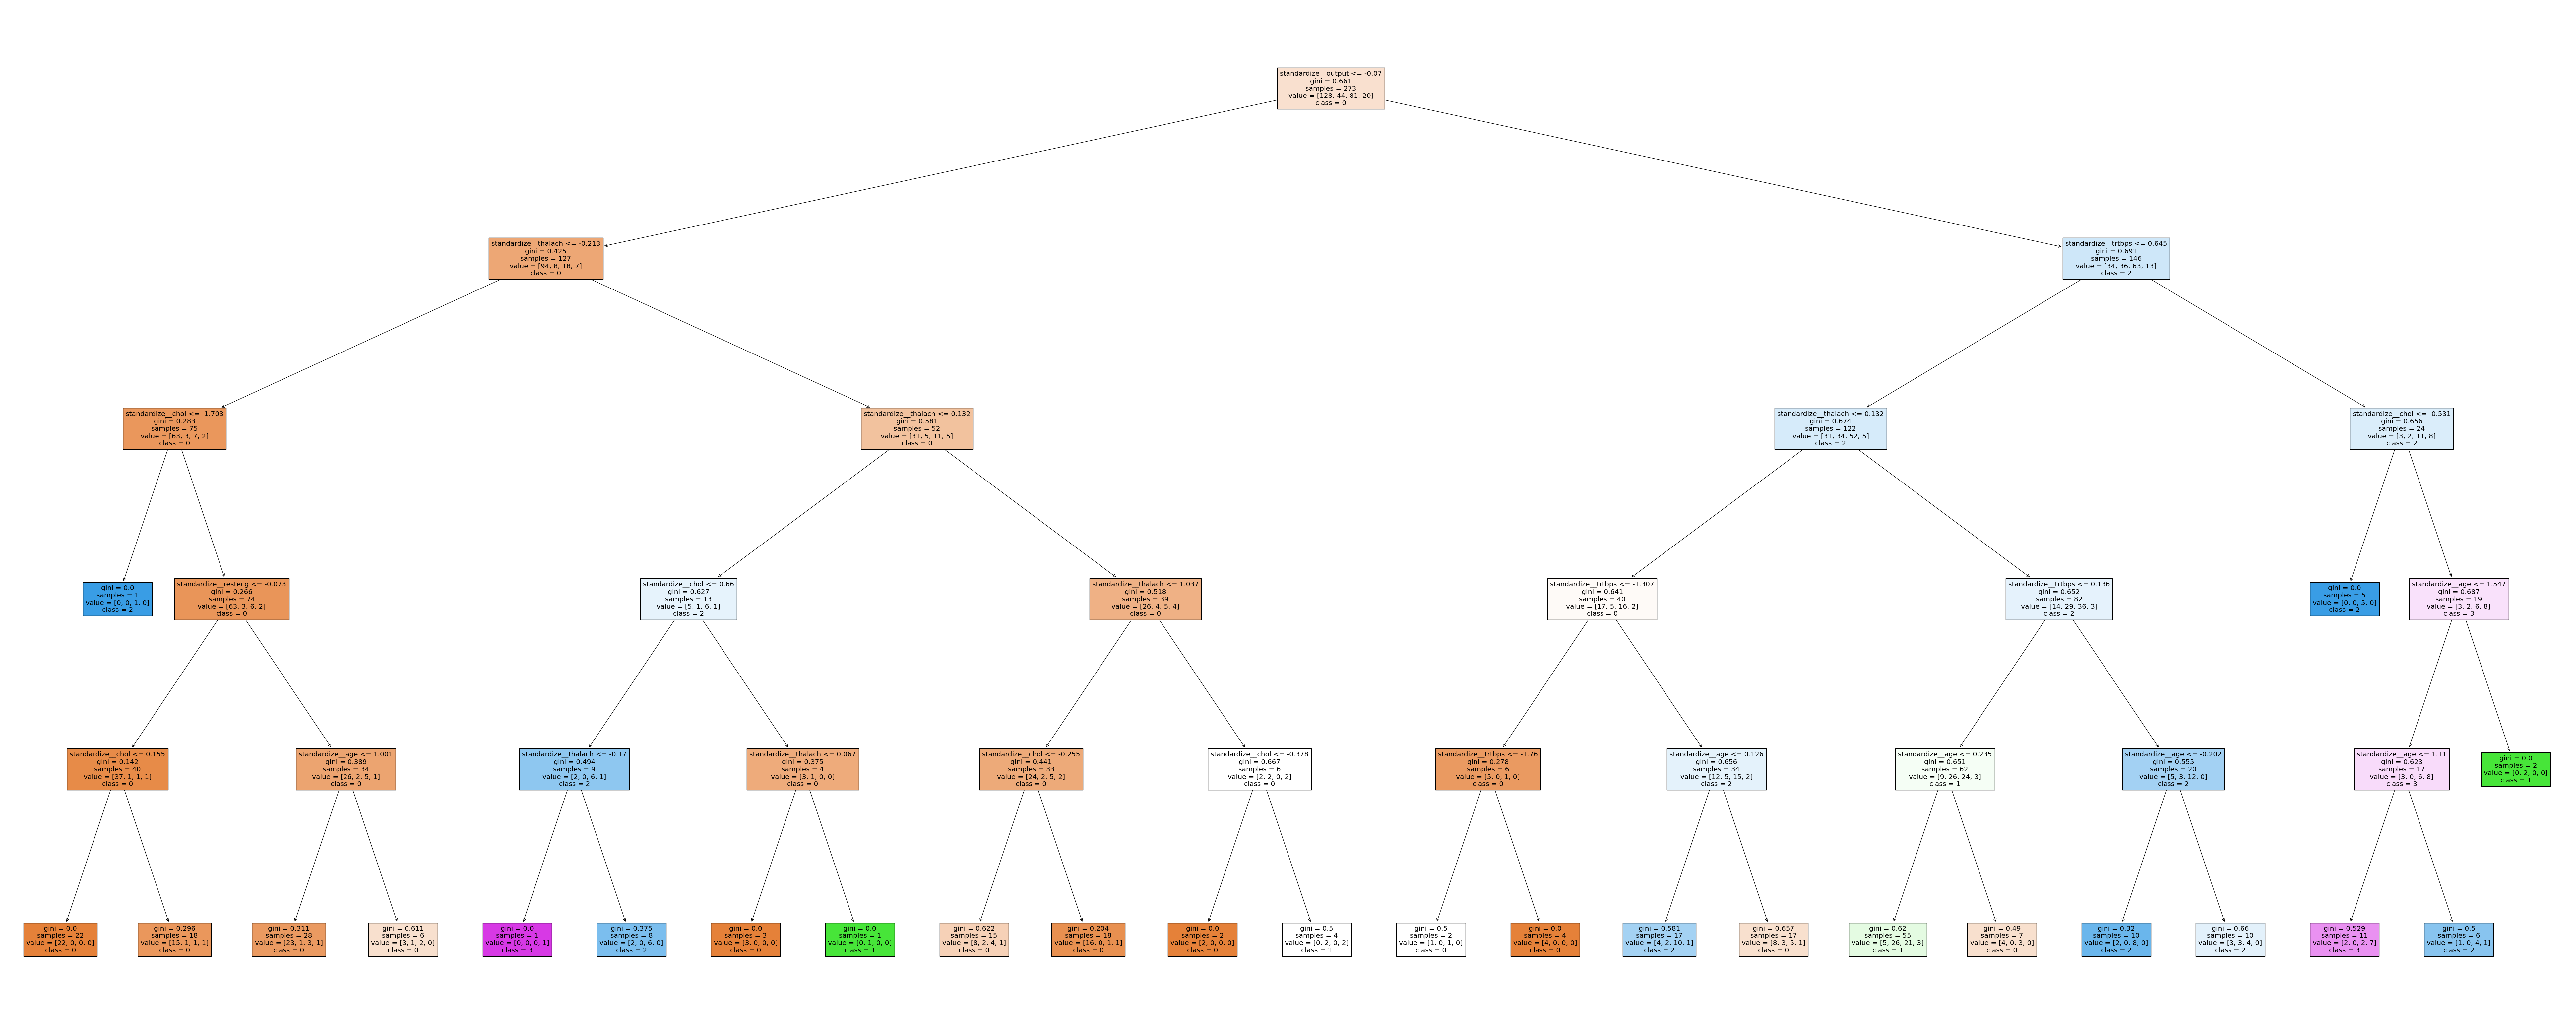

In [ ]:
plt.figure(figsize=(100,40))
plot_tree(best_model.named_steps['decision_tree'], feature_names=ct.fit_transform(X).columns.tolist(), class_names=['0','1','2','3'],filled = True)
plt.show()

In [ ]:
ct.fit_transform(X)

array([[ 0.94595416,  0.69548232,  0.73019948, ..., -1.02157259,
         0.02384305,  0.93266447],
       [-1.89671419,  0.69548232, -0.11879736, ...,  0.87563364,
         1.61880112,  0.93266447],
       [ 0.18062038,  0.69548232, -0.68479525, ...,  0.87563364,
         1.23083834,  0.93266447],
       ...,
       [-1.022047  ,  0.69548232, -1.25079315, ...,  0.87563364,
        -0.75208249, -1.07219695],
       [ 1.49262115,  0.69548232,  0.67359969, ...,  0.87563364,
        -0.36411972, -1.07219695],
       [ 0.28995377, -1.43785108, -0.11879736, ..., -1.02157259,
         1.05841044, -1.07219695]])

LDA

In [ ]:
#lda
linear_pipe1 = Pipeline([
    ('preprocessing', ct),
    ('lda', LinearDiscriminantAnalysis())
])

degrees = {'decision_tree__max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}

gscv = GridSearchCV(Decision_Tree_pipe1, degrees, cv=5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

result_df = pd.DataFrame(data={'decision_tree__max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], "scores": gscv_fitted.cv_results_['mean_test_score']})
max_index = result_df['scores'].idxmax()

row_with_max_value = result_df.loc[max_index]

print(row_with_max_value)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [18]:
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)

In [ ]:
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0,0,0,0,1
269,57,0,0,140,241,1,123,0,0,0,0,1
270,45,1,3,110,264,1,132,0,1,0,0,0
271,68,1,0,144,193,1,141,0,0,0,0,1


In [ ]:
#logistic
logistic_regression_pipeline_1 = Pipeline(
  [('preprocessing', ct),
  ("logistic", LogisticRegression())]
)
logistic_regression_pipeline_1.fit(X, ha['cp_is_3'])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3a049653c0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3a04964130>)])),
                ('logistic', LogisticRegression())])

In [ ]:
y_pred_3 = logistic_regression_pipeline_1.predict(X)

# Calculate F1 score
f1 = f1_score(ha['cp_is_3'], y_pred_3)
f1

0.0

In [ ]:
logistic_regression_pipeline_1.fit(X, ha['cp_is_2'])
y_pred_2 = logistic_regression_pipeline_1.predict(X)

# Calculate F1 score
f1 = f1_score(ha['cp_is_2'], y_pred_2)
f1

0.20408163265306123

In [ ]:
logistic_regression_pipeline_1.fit(X, ha['cp_is_1'])
y_pred_1 = logistic_regression_pipeline_1.predict(X)

# Calculate F1 score
f1 = f1_score(ha['cp_is_1'], y_pred_1)
f1

0.0

In [ ]:
logistic_regression_pipeline_1.fit(X, ha['cp_is_0'])
y_pred_0 = logistic_regression_pipeline_1.predict(X)

# Calculate F1 score
f1 = f1_score(ha['cp_is_0'], y_pred_0)
f1

0.7286821705426355

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

group 0 and 1

In [ ]:
ha01 = ha[ha['cp'].isin([0, 1])]

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1
5,56,0,1,140,294,0,153,1,0,0,1,0
6,44,1,1,120,263,1,173,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
267,63,0,0,124,197,1,136,0,0,0,0,1
268,59,1,0,164,176,0,90,0,0,0,0,1
269,57,0,0,140,241,1,123,0,0,0,0,1
271,68,1,0,144,193,1,141,0,0,0,0,1


In [ ]:
ha01 = ha01.drop(['cp_is_3', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)


In [ ]:
X_1=ha01.drop(['cp'],axis=1)
y_1 = ha01['cp']

In [ ]:
logistic_regression_pipeline_1 = Pipeline(
  [('preprocessing', ct),
  ("logistic", LogisticRegression())]
)
logistic_regression_pipeline_1.fit(X_1,y_1)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3a049653c0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e3a04964130>)])),
                ('logistic', LogisticRegression())])

In [ ]:
roc_auc_1 = cross_val_score(logistic_regression_pipeline_1, X_1, y_1, cv=5, scoring='roc_auc')
np.mean(roc_auc_1)

0.8376709401709401

group 0 and 2

In [20]:
ha02 = ha[ha['cp'].isin([0, 2])]

In [21]:
ha02 = ha02.drop(['cp_is_3', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)
X_2=ha02.drop(['cp'],axis=1)
y_2 = ha02['cp']
logistic_regression_pipeline_2 = Pipeline(
  [('preprocessing', ct),
  ("logistic", LogisticRegression())]
)
logistic_regression_pipeline_2.fit(X_2,y_2)
roc_auc_2 = cross_val_score(logistic_regression_pipeline_2, X_2, y_2, cv=5, scoring='roc_auc')
np.mean(roc_auc_2)

0.7515837104072398

group 0 and 3

In [22]:
ha03 = ha[ha['cp'].isin([0, 3])]
ha03 = ha03.drop(['cp_is_3', 'cp_is_2', 'cp_is_1', 'cp_is_0'], axis=1)
X_3 =ha03.drop(['cp'],axis=1)
y_3 = ha03['cp']
logistic_regression_pipeline_3 = Pipeline(
  [('preprocessing', ct),
  ("logistic", LogisticRegression())]
)
logistic_regression_pipeline_3.fit(X_3,y_3)
roc_auc_3 = cross_val_score(logistic_regression_pipeline_3, X_3, y_3, cv=5, scoring='roc_auc')
np.mean(roc_auc_3)

0.7412307692307692

It seems like it's best at distinguishing 0 and 1.